# REGRESSION

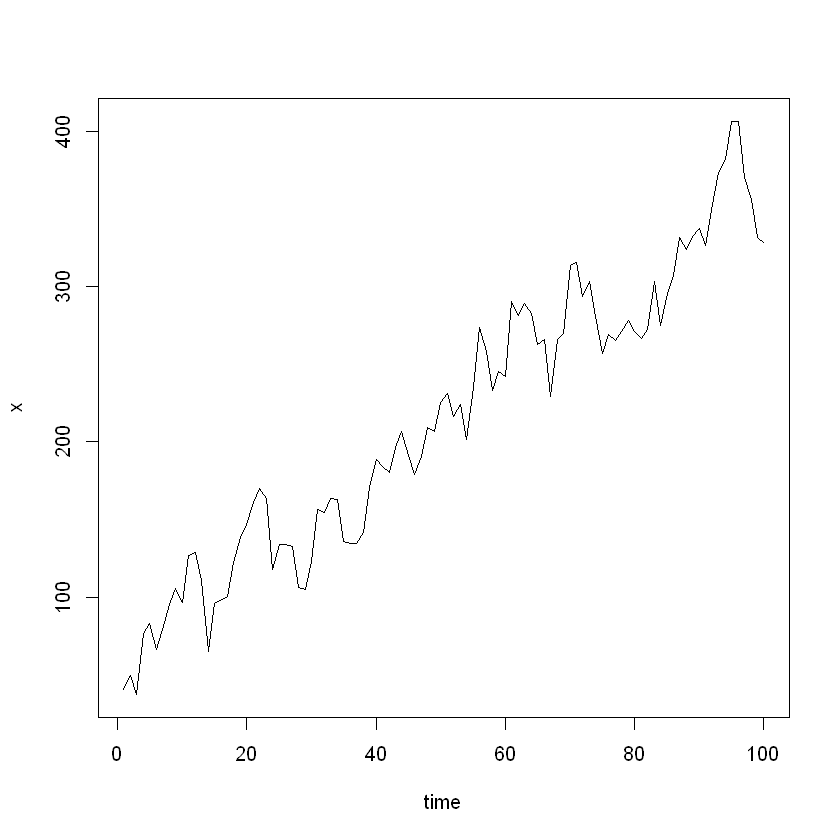

In [1]:
set.seed(1)
z <- w <- rnorm(100, sd=20)
for (t in 2:100) z[t] <- 0.8*z[t-1] + w[t]
Time <- 1:100
x <- 50 + 3*Time + z

plot(x, xlab = 'time', type = 'l')


In [2]:
# Linear models are usually fitted by minimising the sum of squared errors

x.lm <- lm(x~Time)
coef(x.lm)

(Intercept)        Time 
  58.551218    3.063275

In [3]:
sqrt(diag(vcov(x.lm)))

summary(x.lm)#  t-tests showed may be incorrect for a time series regression analysis due to autocorrelation in the residuals.


(Intercept)        Time 
 4.88006278  0.08389621


Call:
lm(formula = x ~ Time)

Residuals:
   Min     1Q Median     3Q    Max 
-42.30 -16.44  -0.54  13.66  57.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  58.5512     4.8801   12.00   <2e-16 ***
Time          3.0633     0.0839   36.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.22 on 98 degrees of freedom
Multiple R-squared:  0.9315,	Adjusted R-squared:  0.9308 
F-statistic:  1333 on 1 and 98 DF,  p-value: < 2.2e-16


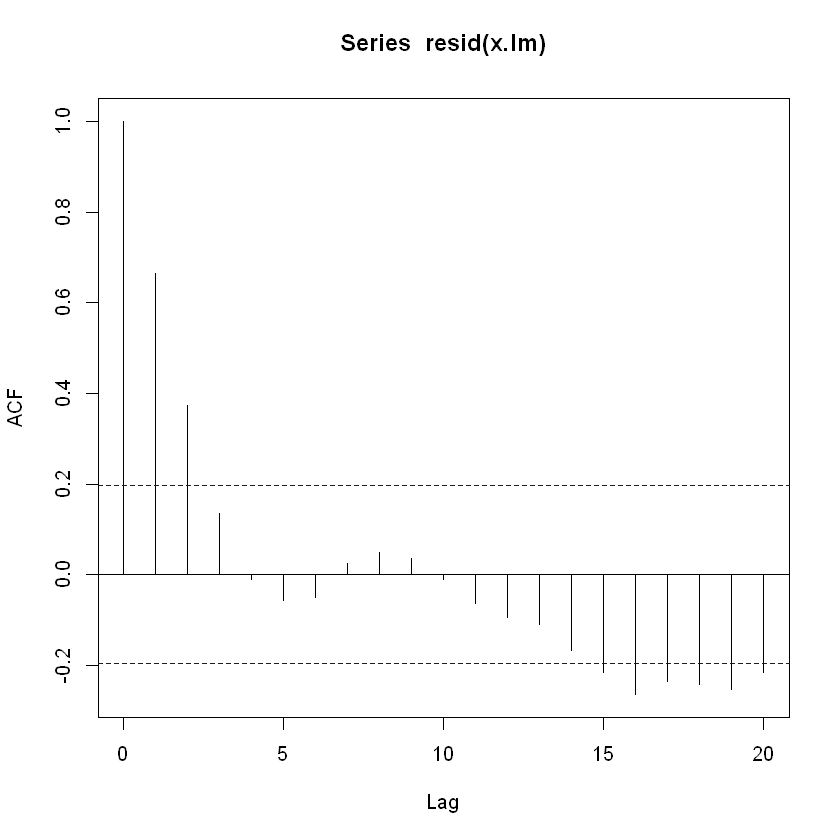

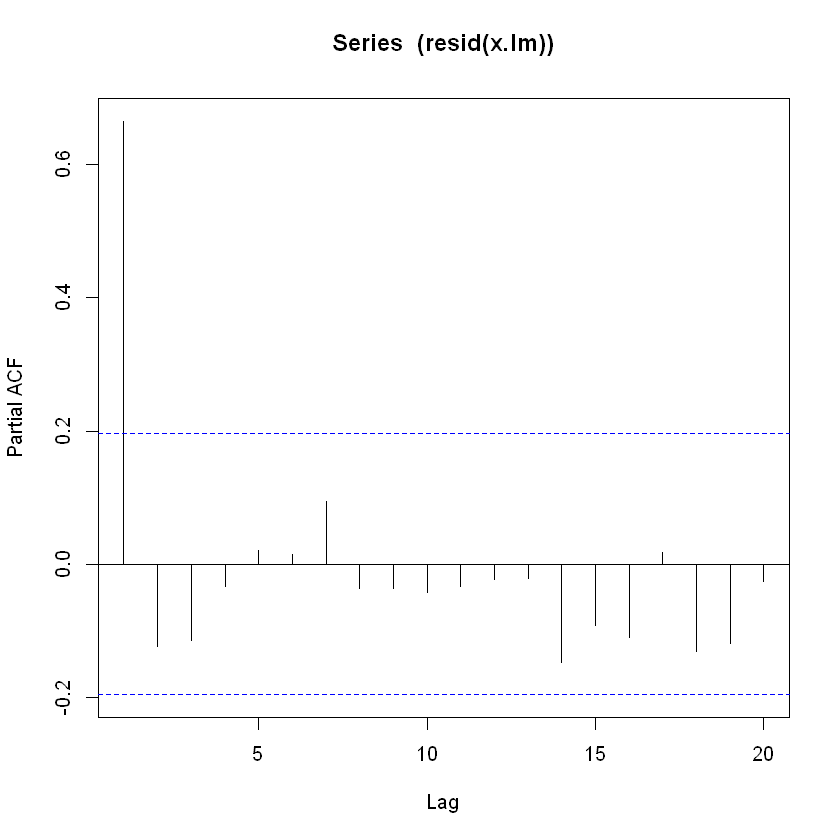

In [4]:
acf(resid(x.lm))# Se observa la autocorrelación de los residuos

pacf((resid(x.lm))) 


Model fitted to the temperature series (1970–2005)


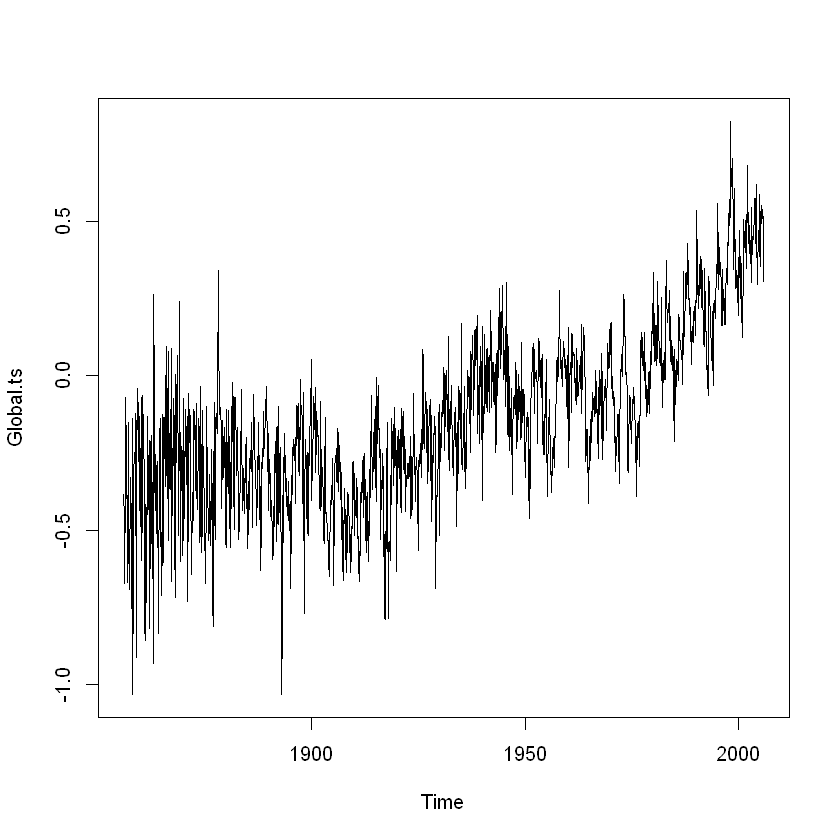

In [5]:

www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/global.dat'
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12), fr = 12)

plot(Global.ts)


(Intercept)  time(temp) 
 -34.920409    0.017654

,2.5 %,97.5 %
(Intercept),-37.21001248,-32.63080554
time(temp),0.01650228,0.01880572


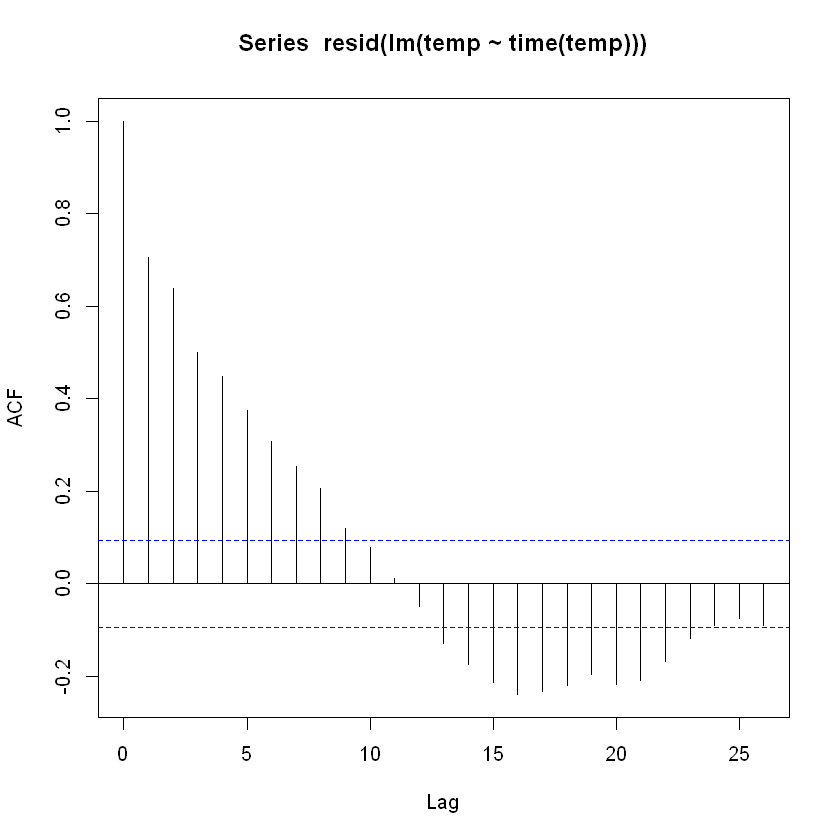

In [6]:
temp <- window(Global.ts, start = 1970)
temp.lm <- lm(temp ~ time(temp))
coef(temp.lm)
confint(temp.lm)

acf(resid(lm(temp~time(temp))))


GLS fit to simulated series

In [7]:
library(nlme)

x.gls <- gls(x ~ Time, cor = corAR1(0.8))# A lag 1 autocorrelation of 0.8 is used
                                         # above because this value was used to 
                                         # simulate the data.
coef(x.gls)
sqrt(diag(vcov(x.gls)))


(Intercept)        Time 
  58.233018    3.042245

(Intercept)        Time 
 11.9245679   0.2024447

In [8]:
summary(x.gls)

Generalized least squares fit by REML
  Model: x ~ Time 
  Data: NULL 
       AIC      BIC    logLik
  862.8866 873.2265 -427.4433

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7161368 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 58.23302 11.924568  4.883449       0
Time         3.04225  0.202445 15.027538       0

 Correlation: 
     (Intr)
Time -0.857

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.6171329 -0.6195428  0.0353972  0.5836326  2.3184155 

Residual standard error: 25.58595 
Degrees of freedom: 100 total; 98 residual

Example: Seasonal model for the temperature series (temperature series (1970–2005):

In [9]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/global.dat'

Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12), fr = 12)
temp <- window(Global.ts, start = 1970)

Seas <- cycle(temp)#  to seasonal indices extracted using the function cycle
Time <- time(temp)

temp.lm <- lm(temp ~ 0 + Time + factor(Seas))
coef(temp.lm)


Time  factor(Seas)1  factor(Seas)2  factor(Seas)3  factor(Seas)4 
    0.01770758   -34.99726483   -34.98801824   -35.01002165   -35.01227506 
 factor(Seas)5  factor(Seas)6  factor(Seas)7  factor(Seas)8  factor(Seas)9 
  -35.03369513   -35.02505965   -35.02689640   -35.02476092   -35.03831988 
factor(Seas)10 factor(Seas)11 factor(Seas)12 
  -35.05248996   -35.06557670   -35.04871900

In [10]:
library(nlme)# usando gls o ols da, en este caso, lo mismo
temp.gls <- gls(temp ~ 0 + Time + factor(Seas))
coef(temp.gls)

Time  factor(Seas)1  factor(Seas)2  factor(Seas)3  factor(Seas)4 
    0.01770758   -34.99726483   -34.98801824   -35.01002165   -35.01227506 
 factor(Seas)5  factor(Seas)6  factor(Seas)7  factor(Seas)8  factor(Seas)9 
  -35.03369513   -35.02505965   -35.02689640   -35.02476092   -35.03831988 
factor(Seas)10 factor(Seas)11 factor(Seas)12 
  -35.05248996   -35.06557670   -35.04871900

Using the above fitted model, a two-year-ahead future prediction for the
temperature series is obtained as follows:

In [11]:
new.t <- seq(2006, len = 2 * 12, by = 1/12)

alpha <- coef(temp.lm)[1]
beta <- rep(coef(temp.lm)[2:13], 2)
(alpha * new.t + beta)[1:4]


factor(Seas)1 factor(Seas)2 factor(Seas)3 factor(Seas)4 
    0.5241458     0.5348681     0.5143403     0.5135625

Alternatively, the predict function can be used to make forecasts provided
the new data are correctly labelled within a data.frame:

In [12]:
new.dat <- data.frame(Time = new.t, Seas = rep(1:12, 2))
predict(temp.lm, new.dat)[1:24]

1         2         3         4         5         6         7         8 
0.5241458 0.5348681 0.5143403 0.5135625 0.4936181 0.5037292 0.5033681 0.5069792 
        9        10        11        12        13        14        15        16 
0.4948958 0.4822014 0.4705903 0.4889236 0.5418534 0.5525756 0.5320479 0.5312701 
       17        18        19        20        21        22        23        24 
0.5113256 0.5214367 0.5210756 0.5246867 0.5126034 0.4999090 0.4882979 0.5066312

HARMONIC SEASONAL MODELS

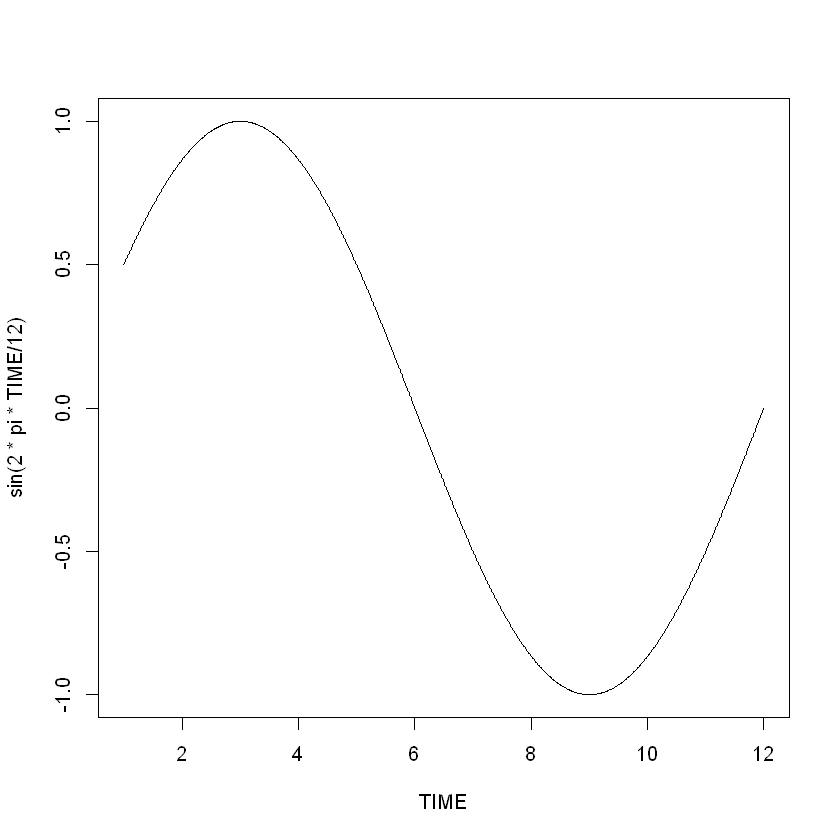

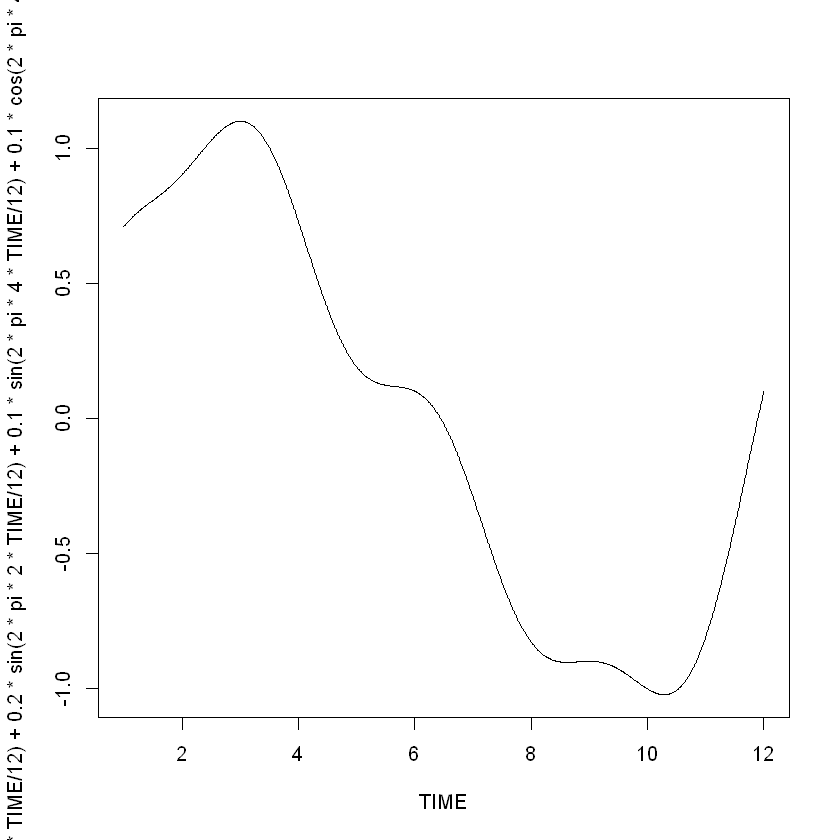

In [13]:
TIME <- seq(1, 12, len = 1000)
plot(TIME, sin(2 * pi * TIME/12), type = "l")

plot(TIME, sin(2 * pi * TIME/12) + 0.2 * sin(2 * pi * 2 *
      TIME/12) + 0.1 * sin(2 * pi * 4 * TIME/12) + 0.1 *
      cos(2 * pi * 4 * TIME/12), type = "l")

Simulation

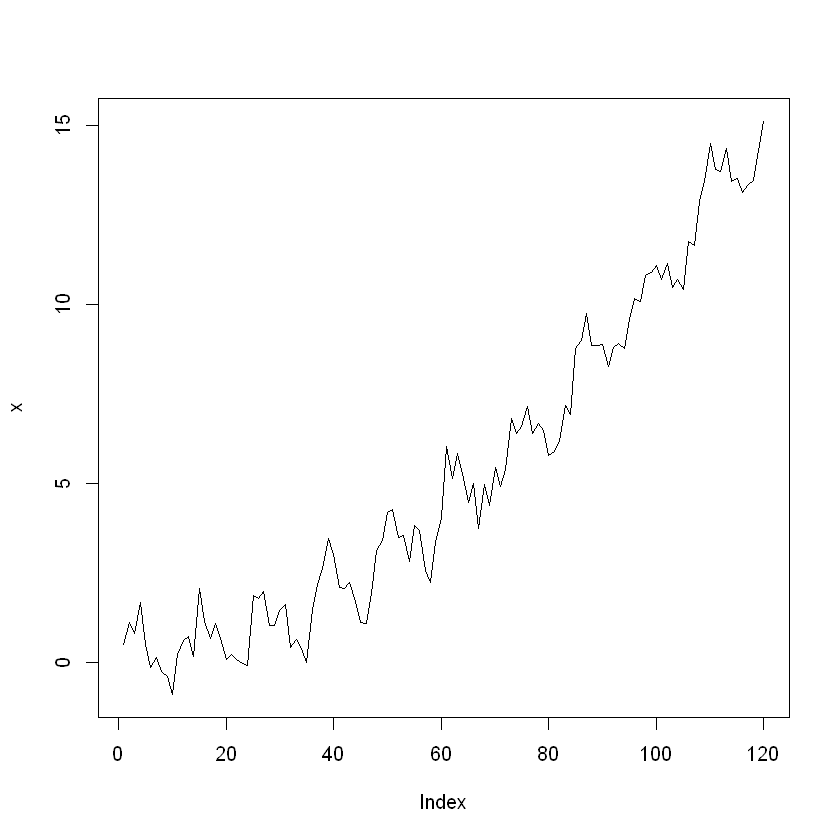

In [14]:
set.seed(1)
TIME <- 1:(10*12)
w <- rnorm(10*12, sd=0.5)

Trend <- 0.1 + 0.005*TIME + 0.001*TIME^2
Seasonal <- sin(2*pi*TIME/12) + 0.2*sin(2*pi*2*TIME/12) +
  0.1*sin(2*pi*4*TIME/12) + 0.1*cos(2*pi*4*TIME/12)

x <- Trend + Seasonal + w
plot(x, type = 'l')

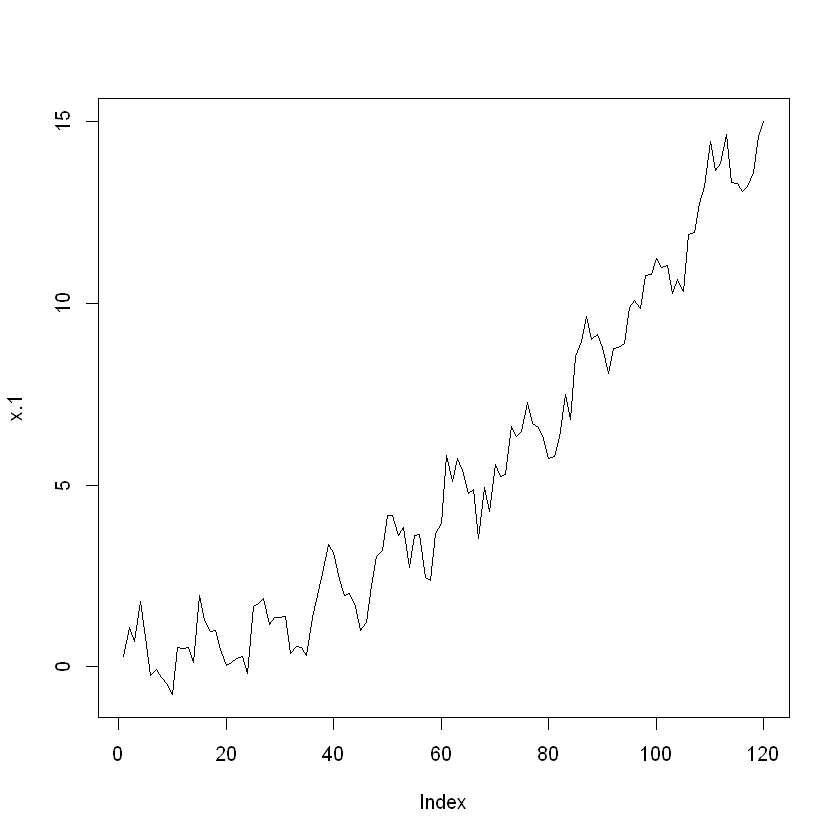

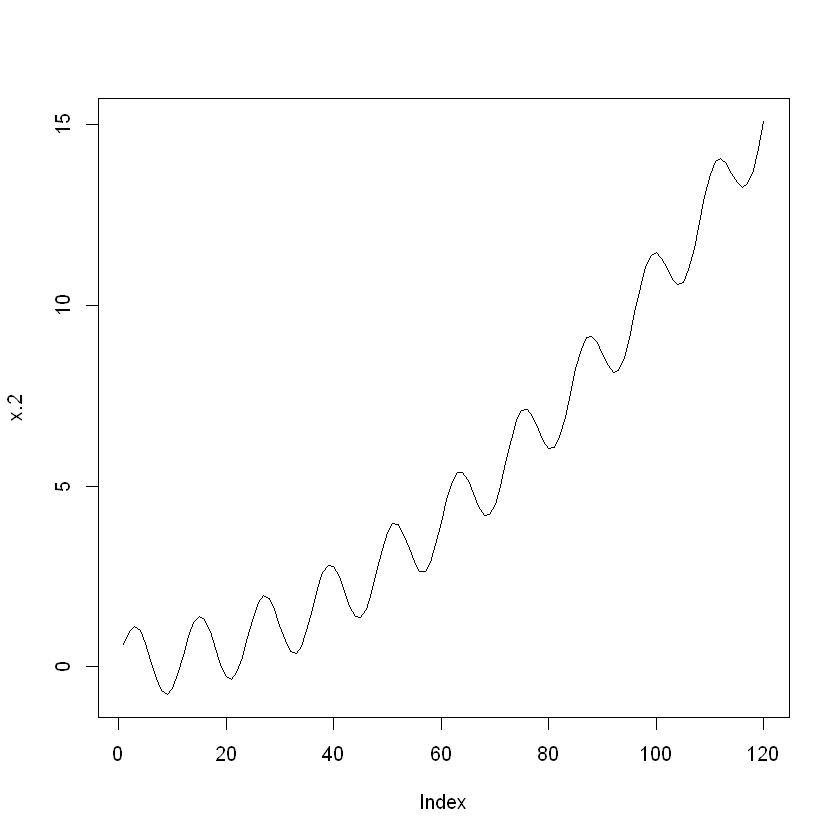

In [15]:
#################################
# Esto es aparte, solo para ver cómo afecta con o sin ruido la serie
Seasonal.1 <- sin(2*pi*TIME/12)
x.1 <- Trend + Seasonal.1 + w
plot(x.1, type = 'l')

x.2 <- Trend + Seasonal.1# sin el ruido
plot(x.2, type = 'l')
################################

Fit to simulated series

In [16]:
SIN <- COS <- matrix(nr = length(TIME), nc = 6)

for (i in 1:6){
  COS[, i] <- cos(2 * pi * i * TIME/12)
  SIN[, i] <- sin(2 * pi * i * TIME/12)
}

x.lm1 <- lm(x ~ TIME + I(TIME^2) + COS[, 1] + SIN[, 1] +
              COS[, 2] + SIN[, 2] + COS[, 3] + SIN[, 3] + COS[, 4] +
              SIN[, 4] + COS[, 5] + SIN[, 5] + COS[, 6] + SIN[, 6])

coef(x.lm1)/sqrt(diag(vcov(x.lm1)))

# Para elegir con cuáles de los términos me quedo, por convención se dice que la significancia es cuando t-ratio es 
# por lo menos valor 2. Ese valor se consigue dividiendo el coeficiente estimado dividido el error estandar del coeficiente
# que en este caso es: coef(x.lm1)/sqrt(diag(vcov(x.lm1)))


(Intercept)        TIME   I(TIME^2)    COS[, 1]    SIN[, 1]    COS[, 2] 
  1.2390758   1.1251009  25.9327239   0.3277392  15.4421538  -0.5146350 
   SIN[, 2]    COS[, 3]    SIN[, 3]    COS[, 4]    SIN[, 4]    COS[, 5] 
  3.4468652   0.2317975  -0.7027368   0.2276273   1.0525101  -1.1501077 
   SIN[, 5]    COS[, 6]    SIN[, 6] 
  0.8573601  -0.3100137   0.3823931

In [17]:
# Por lo arriba mencionado, me quedo con tres términos para construir el modelo:

x.lm2 <- lm(x ~ I(TIME^2) + SIN[, 1] + SIN[, 2])
coef(x.lm2)/sqrt(diag(vcov(x.lm2)))


(Intercept)   I(TIME^2)    SIN[, 1]    SIN[, 2] 
   4.627904  111.143693   15.786425    3.494708

In [18]:
# Los coeficientes del modelo son:
coef(x.lm2)


(Intercept)   I(TIME^2)    SIN[, 1]    SIN[, 2] 
0.280403915 0.001036409 0.900206804 0.198862866

In [19]:
# El modelo de predicción es:

# xˆt = 0.166 + 0.00104t^2 + 0.900 sin(2πt/12) + 0.199 sin(4πt/12)

# The AIC can be used to compare the two fitted models:

AIC(x.lm1)
AIC(x.lm2)# Este tiene valor menor, entonces es el elegido


[1] 165.3526

[1] 149.7256

In [20]:
# Due to sampling variation, the best-fitting model is not identical to the model used to simulate the data, as can easily be verified by
# taking the AIC of the known underlying model:

AIC(lm(x ~ TIME +I(TIME^2) +SIN[,1] +SIN[,2] +SIN[,4] +COS[,4]))


[1] 153.0309

In [21]:
step(x.lm1)# Esta función prueba todas las opciones y al final te tira la mejor modelo, coincide con el que encontramos a pedal: x.lm2


Start:  AIC=-177.19
x ~ TIME + I(TIME^2) + COS[, 1] + SIN[, 1] + COS[, 2] + SIN[, 
    2] + COS[, 3] + SIN[, 3] + COS[, 4] + SIN[, 4] + COS[, 5] + 
    SIN[, 5] + COS[, 6] + SIN[, 6]

            Df Sum of Sq     RSS      AIC
- COS[, 4]   1     0.011  21.357 -179.133
- COS[, 3]   1     0.011  21.357 -179.131
- COS[, 6]   1     0.020  21.366 -179.083
- COS[, 1]   1     0.022  21.368 -179.070
- SIN[, 6]   1     0.030  21.376 -179.026
- COS[, 2]   1     0.054  21.400 -178.890
- SIN[, 3]   1     0.100  21.447 -178.630
- SIN[, 5]   1     0.149  21.496 -178.355
- SIN[, 4]   1     0.225  21.572 -177.933
- TIME       1     0.257  21.604 -177.755
- COS[, 5]   1     0.269  21.615 -177.690
<none>                    21.346 -177.193
- SIN[, 2]   1     2.415  23.762 -166.329
- SIN[, 1]   1    48.479  69.825  -36.979
- I(TIME^2)  1   136.720 158.067   61.063

Step:  AIC=-179.13
x ~ TIME + I(TIME^2) + COS[, 1] + SIN[, 1] + COS[, 2] + SIN[, 
    2] + COS[, 3] + SIN[, 3] + SIN[, 4] + COS[, 5] + SIN[, 5]


Call:
lm(formula = x ~ I(TIME^2) + SIN[, 1] + SIN[, 2])

Coefficients:
(Intercept)    I(TIME^2)     SIN[, 1]     SIN[, 2]  
   0.280404     0.001036     0.900207     0.198863  


HARMONIC MODEL FITTED TO TEMPERATURE SERIES (1970–2005)

In [22]:
SIN <- COS <- matrix(nr = length(temp), nc = 6)
for (i in 1:6) {
  COS[, i] <- cos(2 * pi * i * time(temp))
  SIN[, i] <- sin(2 * pi * i * time(temp))
}

TIME <- (time(temp) - mean(time(temp)))/sd(time(temp))

mean(time(temp))
sd(time(temp))


[1] 1987.958

[1] 10.40433

In [23]:
temp.lm1 <- lm(temp ~ TIME + I(TIME^2) +
                 COS[,1] + SIN[,1] + COS[,2] + SIN[,2] +
                 COS[,3] + SIN[,3] + COS[,4] + SIN[,4] +
                 COS[,5] + SIN[,5] + COS[,6] + SIN[,6])

coef(temp.lm1)/sqrt(diag(vcov(temp.lm1)))

(Intercept)        TIME   I(TIME^2)    COS[, 1]    SIN[, 1]    COS[, 2] 
 18.2569117  30.2800742   1.2736899   0.7447906   2.3845512   1.2086419 
   SIN[, 2]    COS[, 3]    SIN[, 3]    COS[, 4]    SIN[, 4]    COS[, 5] 
  1.9310853   0.6448116   0.3971873   0.5468025   0.1681753   0.3169782 
   SIN[, 5]    COS[, 6]    SIN[, 6] 
  0.3504607  -0.4498741  -0.6216650

In [24]:
temp.lm2 <- lm(temp ~ TIME + SIN[, 1] + SIN[, 2])
coef(temp.lm2)


(Intercept)        TIME    SIN[, 1]    SIN[, 2] 
 0.17501157  0.18409618  0.02041803  0.01615374

In [25]:
AIC(temp.lm)
AIC(temp.lm1)
AIC(temp.lm2)


[1] -546.9577

[1] -545.0491

[1] -561.1779

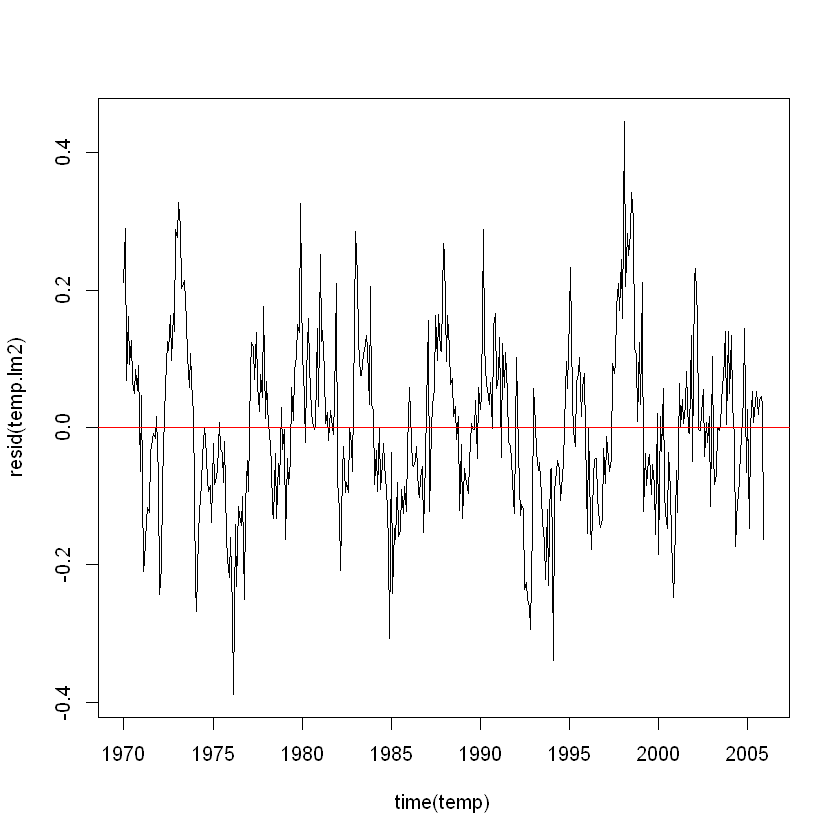

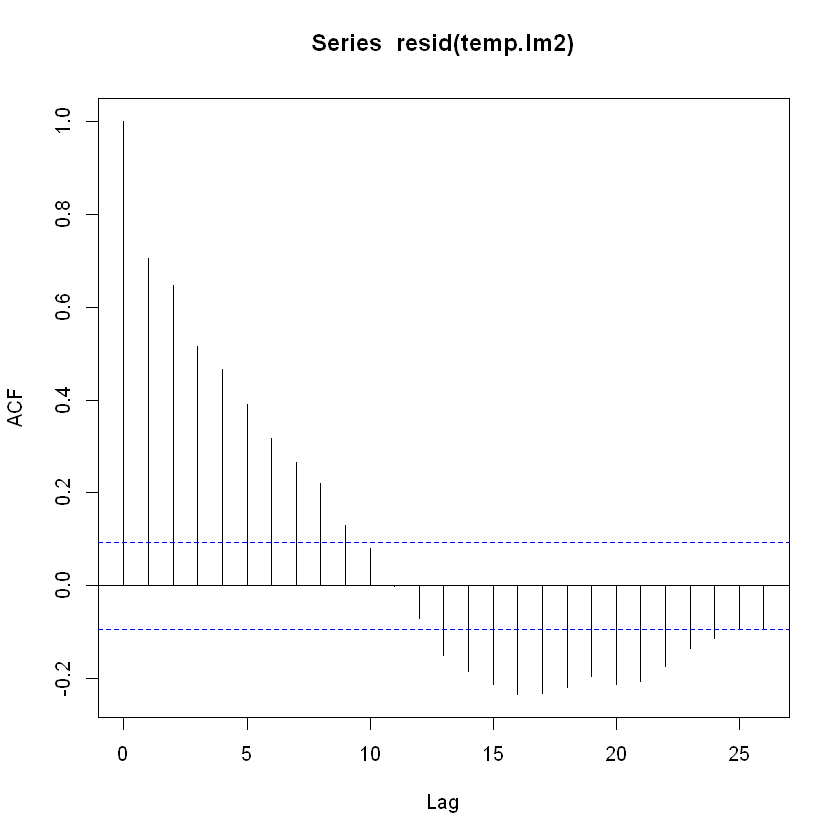

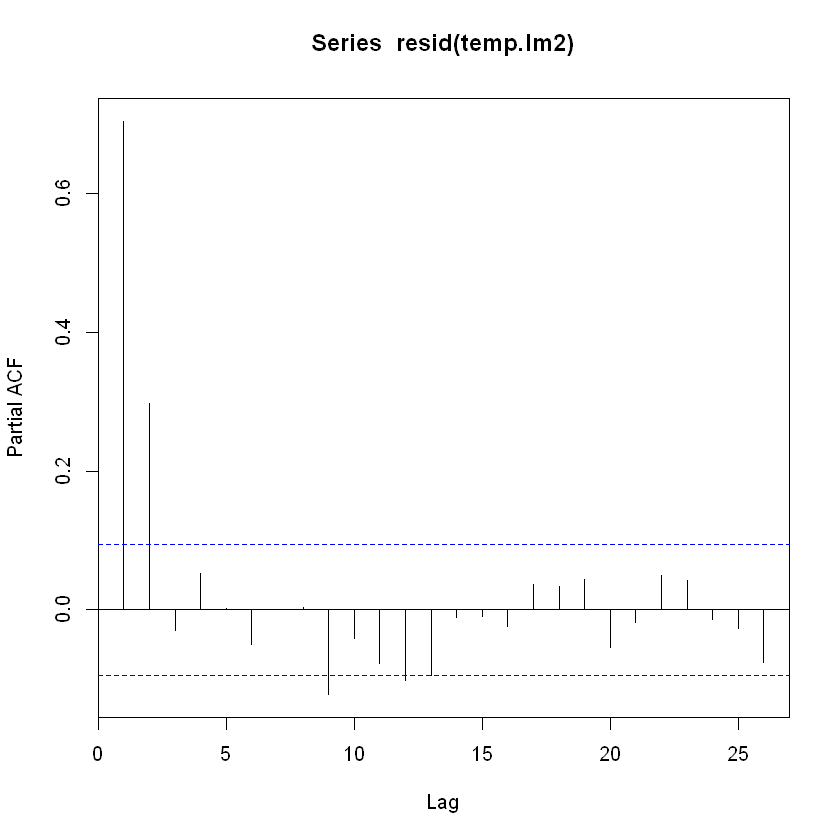

In [26]:
plot(time(temp), resid(temp.lm2), type = "l")
abline(0, 0, col = "red")

acf(resid(temp.lm2))
pacf(resid(temp.lm2))

# El plot de acf muestra que los residuos están autocorrelacionados. 
# Mirando el pacf se sugiere AR(2) en los residuos.


[1] 2

[1] 0.4938189 0.3071598

[1] 0.08373324

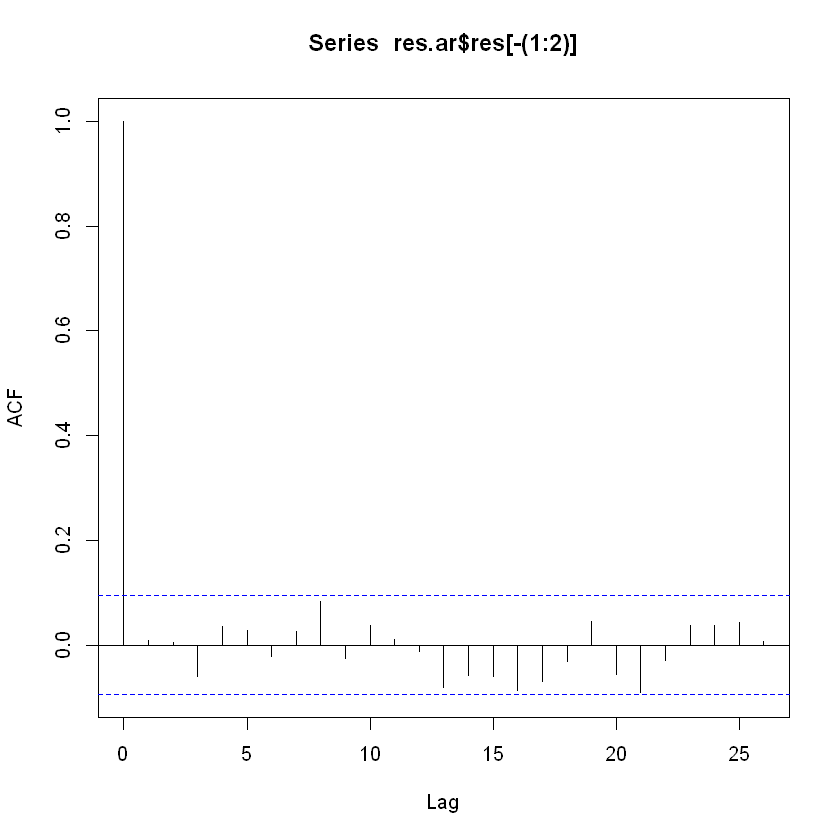

In [27]:
res.ar <- ar(resid(temp.lm2), method = "mle")
res.ar$order
res.ar$ar
sd(res.ar$res[-(1:2)])# es el desvío de los resíduos

acf(res.ar$res[-(1:2)])# estos residuos aparecen como white noise.

LOGARITHMIC TRANSFORMATIONS

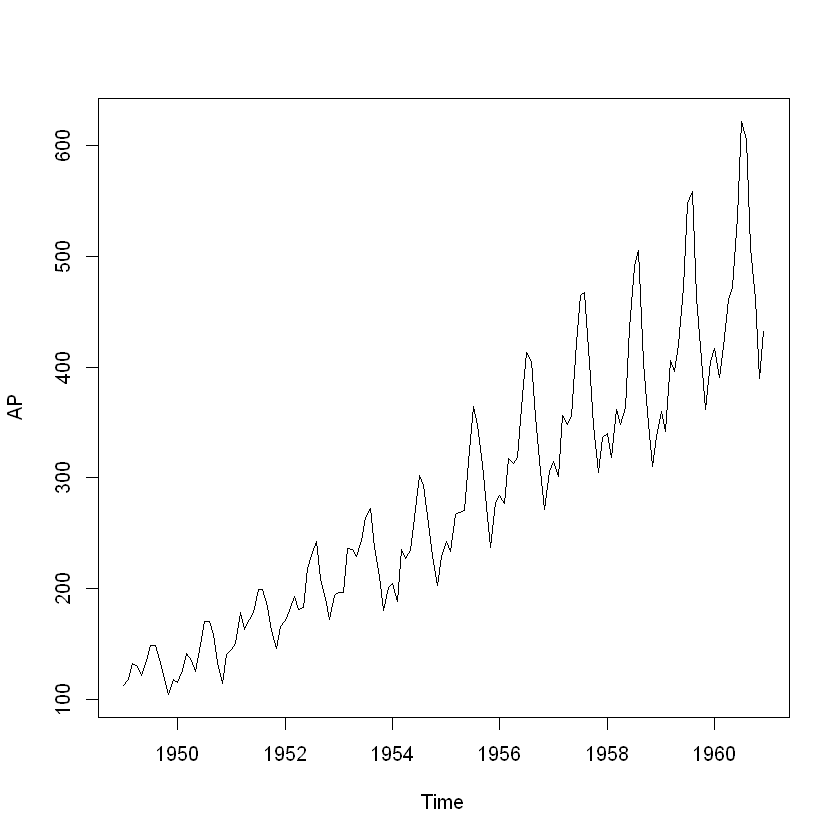

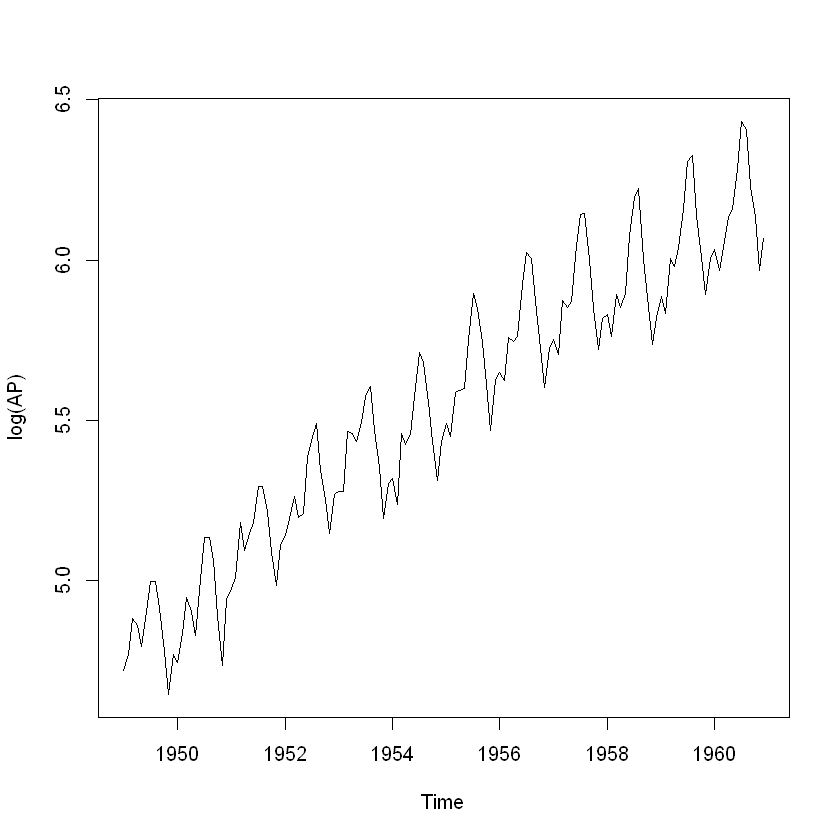

In [28]:
data("AirPassengers")
AP <- AirPassengers

plot(AP)# aumenta la varianza con el tiempo.
plot(log(AP))# permite mantener la varianza menos variable en el tiempo.

In [29]:
SIN <- COS <- matrix(nr = length(AP), nc = 6)

for (i in 1:6) {
  SIN[, i] <- sin(2 * pi * i * time(AP))
  COS[, i] <- cos(2 * pi * i * time(AP))
}

TIME <- (time(AP) - mean(time(AP)))/sd(time(AP))

mean(time(AP))
sd(time(AP))


[1] 1954.958

[1] 3.476109

In [30]:
AP.lm1 <- lm(log(AP) ~ TIME + I(TIME^2) + I(TIME^3) + I(TIME^4) +
               SIN[,1] + COS[,1] + SIN[,2] + COS[,2] + SIN[,3] + COS[,3] +
               SIN[,4] + COS[,4] + SIN[,5] + COS[,5] + SIN[,6] + COS[,6])

coef(AP.lm1)/sqrt(diag(vcov(AP.lm1)))


(Intercept)        TIME   I(TIME^2)   I(TIME^3)   I(TIME^4)    SIN[, 1] 
744.6853769  42.3818033  -4.1623354  -0.7514937   1.8725575   4.8678543 
   COS[, 1]    SIN[, 2]    COS[, 2]    SIN[, 3]    COS[, 3]    SIN[, 4] 
-26.0548660  10.3951486  10.0039542  -4.8436269  -1.5601366  -5.6662082 
   COS[, 4]    SIN[, 5]    COS[, 5]    SIN[, 6]    COS[, 6] 
  1.9459153  -3.7662018   1.0259589   0.1500951  -0.5213860

In [31]:
AP.lm2 <- lm(log(AP) ~ TIME + I(TIME^2) + SIN[,1] + COS[,1] +
               SIN[,2] + COS[,2] + SIN[,3] + SIN[,4] + COS[,4] + SIN[,5])

coef(AP.lm2)/sqrt(diag(vcov(AP.lm2)))
 
AIC(AP.lm1)
AIC(AP.lm2)


(Intercept)        TIME   I(TIME^2)    SIN[, 1]    COS[, 1]    SIN[, 2] 
 922.625445  103.520628   -8.235569    4.916041  -25.813114   10.355319 
   COS[, 2]    SIN[, 3]    SIN[, 4]    COS[, 4]    SIN[, 5] 
   9.961335   -4.789997   -5.612235    1.949391   -3.730666

[1] -447.9475

[1] -451.0749

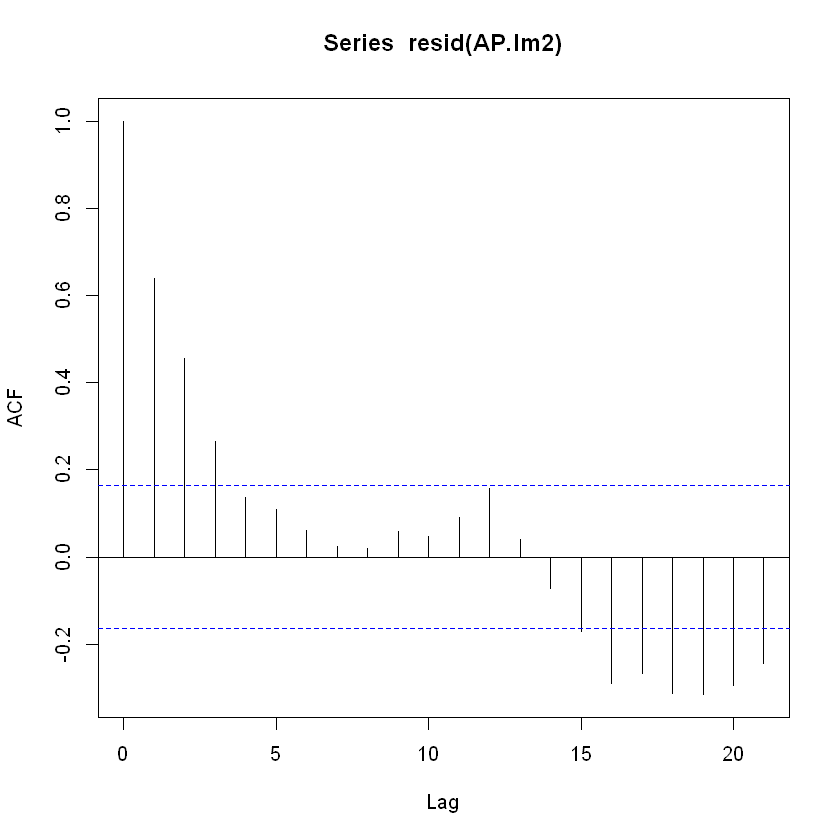

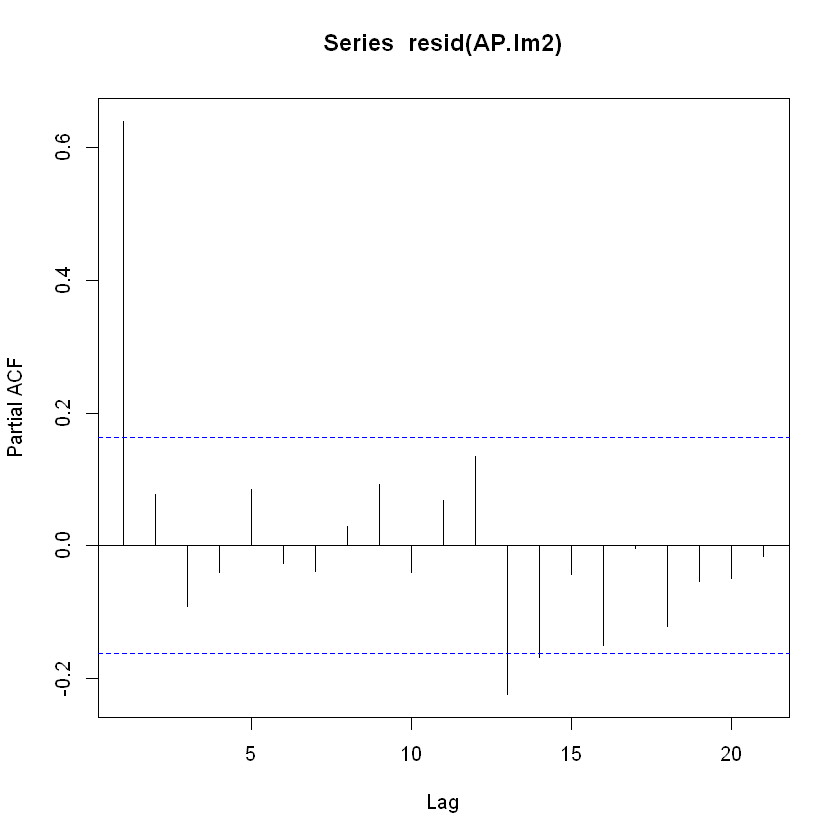

In [32]:
acf(resid(AP.lm2))

pacf(resid(AP.lm2))

In [34]:
library(nlme)

AP.gls <- gls(log(AP) ~ TIME + I(TIME^2) + SIN[,1] + COS[,1] +
                SIN[,2] + COS[,2] + SIN[,3] + SIN[,4] + COS[,4] + SIN[,5],
              cor = corAR1(0.6))

coef(AP.gls)/sqrt(diag(vcov(AP.gls)))

# veo que todos los coeficientes están cerca de 2 o superiores a 2.

(Intercept)        TIME   I(TIME^2)    SIN[, 1]    COS[, 1]    SIN[, 2] 
 398.841577   45.850520   -3.651287    3.299713  -18.177844   11.768934 
   COS[, 2]    SIN[, 3]    SIN[, 4]    COS[, 4]    SIN[, 5] 
  11.432678   -7.630660  -10.749938    3.571395   -7.920777

[1] 0.6410685

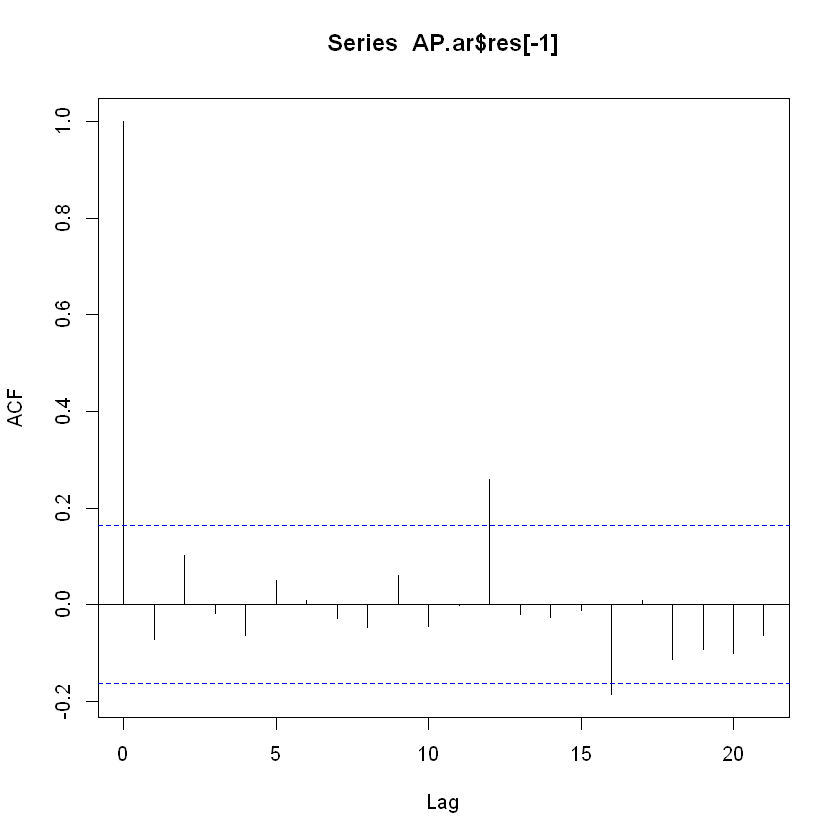

In [35]:
AP.ar <- ar(resid(AP.lm2), order = 1, method = "mle")
AP.ar$ar

acf(AP.ar$res[-1])# autocorrelación de los residuos que provienen del modelo de autoregresion de los residuos del modelo principal. 


In [36]:
############################

probemos con step()

Start:  AIC=-858.6
log(AP) ~ TIME + I(TIME^2) + I(TIME^3) + I(TIME^4) + SIN[, 1] + 
    COS[, 1] + SIN[, 2] + COS[, 2] + SIN[, 3] + COS[, 3] + SIN[, 
    4] + COS[, 4] + SIN[, 5] + COS[, 5] + SIN[, 6] + COS[, 6]

            Df Sum of Sq    RSS     AIC
- SIN[, 6]   1    0.0001 0.2927 -860.58
- COS[, 6]   1    0.0006 0.2933 -860.29
- I(TIME^3)  1    0.0013 0.2939 -859.96
- COS[, 5]   1    0.0024 0.2951 -859.41
<none>                   0.2926 -858.60
- COS[, 3]   1    0.0056 0.2982 -857.87
- I(TIME^4)  1    0.0081 0.3007 -856.68
- COS[, 4]   1    0.0087 0.3014 -856.37
- SIN[, 5]   1    0.0327 0.3253 -845.36
- I(TIME^2)  1    0.0399 0.3326 -842.19
- SIN[, 3]   1    0.0541 0.3467 -836.19
- SIN[, 1]   1    0.0546 0.3472 -835.97
- SIN[, 4]   1    0.0740 0.3666 -828.15
- COS[, 2]   1    0.2306 0.5232 -776.92
- SIN[, 2]   1    0.2490 0.5416 -771.95
- COS[, 1]   1    1.5643 1.8569 -594.53
- TIME       1    4.1389 4.4316 -469.27

Step:  AIC=-860.58
log(AP) ~ TIME + I(TIME^2) + I(TIME^3) + I(TIME


Call:
lm(formula = log(AP) ~ TIME + I(TIME^2) + I(TIME^4) + SIN[, 1] + 
    COS[, 1] + SIN[, 2] + COS[, 2] + SIN[, 3] + COS[, 3] + SIN[, 
    4] + COS[, 4] + SIN[, 5])

Coefficients:
(Intercept)         TIME    I(TIME^2)    I(TIME^4)     SIN[, 1]     COS[, 1]  
   5.587706     0.419967    -0.065623     0.011063     0.028154    -0.147488  
   SIN[, 2]     COS[, 2]     SIN[, 3]     COS[, 3]     SIN[, 4]     COS[, 4]  
   0.059095     0.056731    -0.027293    -0.008732    -0.031986     0.011105  
   SIN[, 5]  
  -0.021264  


[1] -453.4617

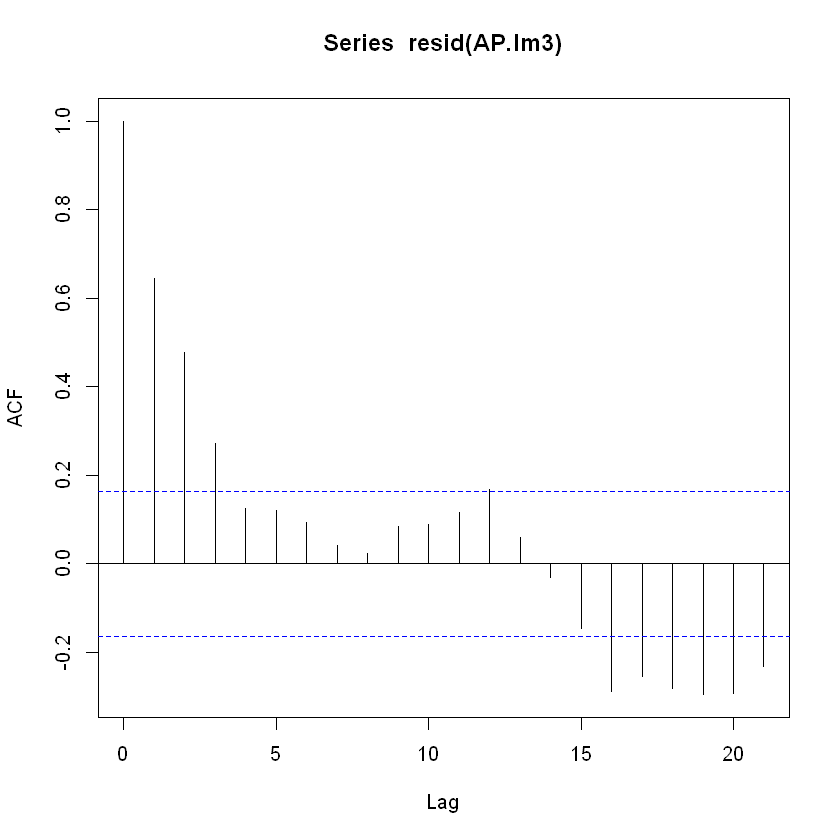

In [41]:

step(AP.lm1)

AP.lm3 <- lm(log(AP) ~ TIME + I(TIME^2) + I(TIME^4) + SIN[, 1] + 
               COS[, 1] + SIN[, 2] + COS[, 2] + SIN[, 3] + COS[, 3] + SIN[, 4] +
               COS[, 4] + SIN[, 5])
AIC(AP.lm3)
# Con step() el modelo elegido tiene más términos
acf(resid(AP.lm3))# practicamente es igual a acf(resid(AP.lm2))


In [42]:
# con gls
AP.lm4 <- gls(log(AP) ~ TIME + I(TIME^2) + I(TIME^3) + I(TIME^4) +
               SIN[,1] + COS[,1] + SIN[,2] + COS[,2] + SIN[,3] + COS[,3] +
               SIN[,4] + COS[,4] + SIN[,5] + COS[,5] + SIN[,6] + COS[,6])

step(AP.lm4)# esto me da error, no se si porque no se puede hacer o hay que agregar algún parámetro.


ERROR: Error in extractAIC.gls(fit, scale, k = k, ...): AIC undefined for REML fit


In [43]:
############################

NON-LINEAR MODELS

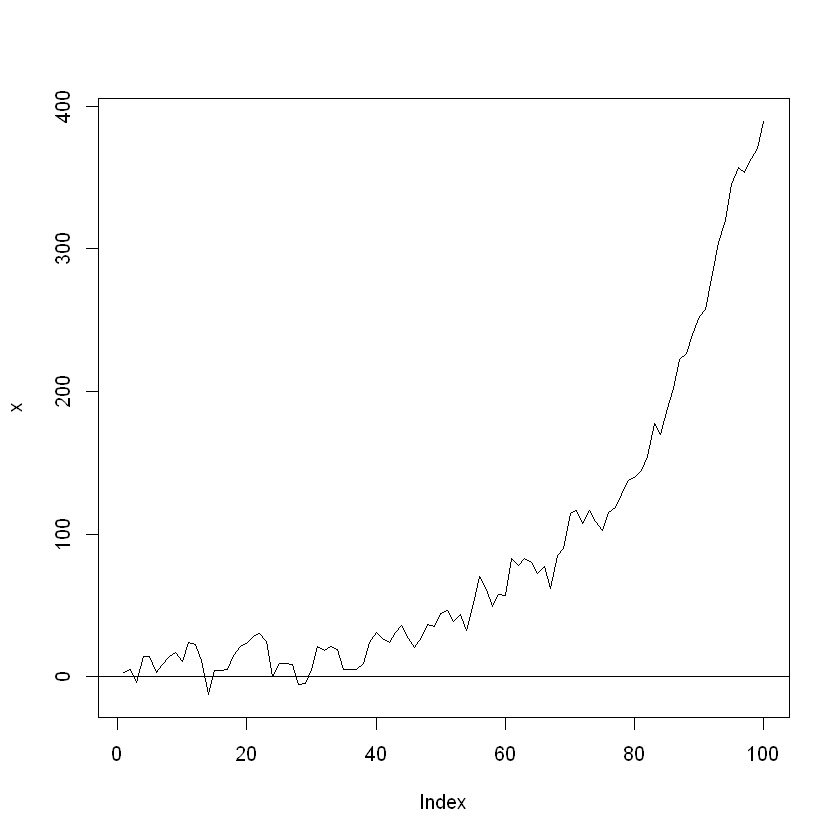

In [44]:
# Example of a simulated and fitted non-linear series
# Below, a non-linear series with AR(1) residuals is simulated and plotted

# In R, a non-linear model can be fitted by least squares using the function nls.

set.seed(1)
w <- rnorm(100, sd=10)
z <- rep(0, 100)
for (t in 2:100) z[t] <- 0.7 * z[t - 1] + w[t]
Time <- 1:100
f <- function(x) exp(1 + 0.05 * x)# xt = −c0 + e(α0+α1t) + zt, este es el modelo usado para luego comparar los parámetros
                                  # estimados con nls.

x <- f(Time) + z
plot(x, type = "l")
abline(0, 0)


In [45]:
# In R, a non-linear model is fitted by specifying a formula with the parameters and their starting values contained in a list:

x.nls <- nls(x ~ exp(alp0 + alp1 * Time), start = list(alp0 = 0.1, alp1 = 0.5))
summary(x.nls)$parameters


,Estimate,Std. Error,t value,Pr(>|t|)
alp0,1.17640120,0.0742954447,15.83410,9.204055e-29
alp1,0.04828424,0.0008188462,58.96619,2.347543e-78


FORECASTING FROM REGRESSION

In [51]:
data("AirPassengers")
AP <- AirPassengers

new.t <- time(ts(start = 1961, end = c(1970, 12), fr = 12))
TIME <- (new.t - mean(time(AP)))/sd(time(AP))
SIN <- COS <- matrix(nr = length(new.t), nc = 6)

for (i in 1:6) {
  COS[, i] <- cos(2 * pi * i * new.t)
  SIN[, i] <- sin(2 * pi * i * new.t)
}

SIN <- SIN[, -6]
new.dat <- data.frame(TIME = as.vector(TIME), SIN = SIN, COS = COS)

AP.pred.ts <- exp(ts(predict(AP.lm2, new.dat), st = 1961, fr = 12))# AP.lm2 viene de antes


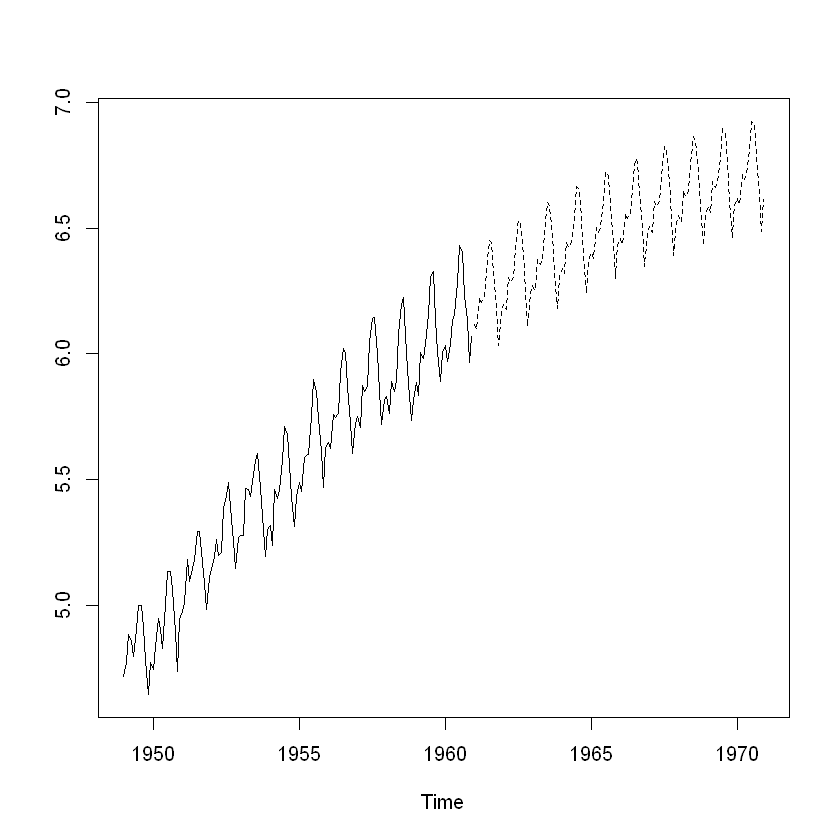

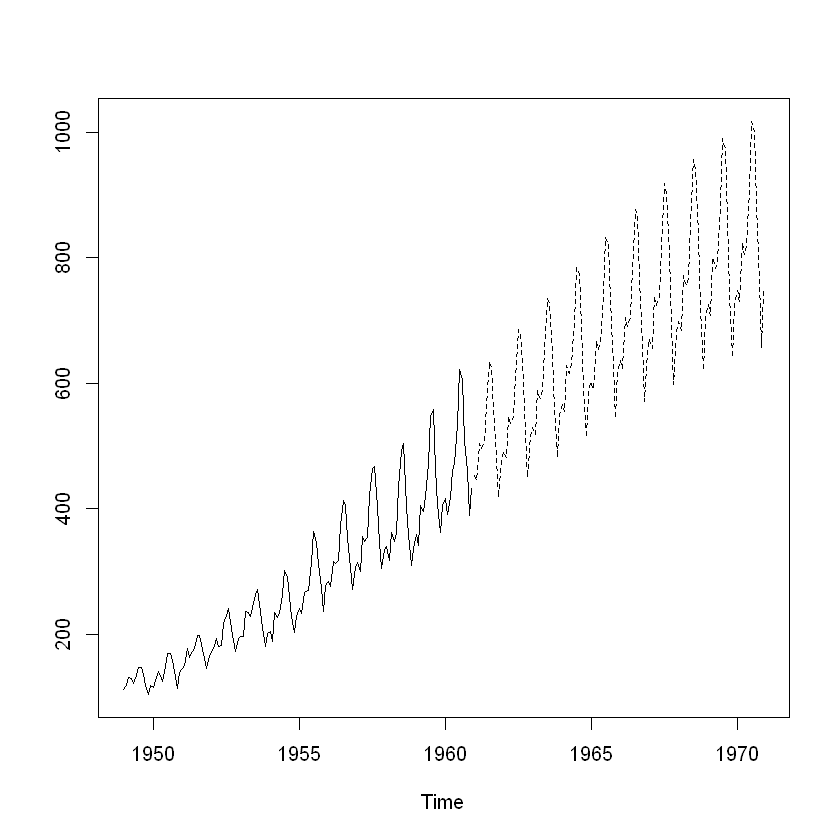

In [52]:
ts.plot(log(AP), log(AP.pred.ts), lty = 1:2)

ts.plot(AP, AP.pred.ts, lty = 1:2)


Inverse transform and bias correction:

In [54]:
summary(AP.lm2)$r.sq# R2

sigma <- summary(AP.lm2)$sigma# 0.048
sigma

lognorm.correction.factor <- exp((1/2) * sigma^2)# 1.001171
lognorm.correction.factor

empirical.correction.factor <- mean(exp(resid(AP.lm2)))# 1.00108
empirical.correction.factor

AP.pred.ts <- AP.pred.ts * empirical.correction.factor# Predicción corregida


[1] 0.9888318

[1] 0.04837501

[1] 1.001171

[1] 1.00108